In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [39]:
df_train = pd.read_csv('../data/training_data.csv', low_memory=False)
df_macro = pd.read_csv('../data/macro_data.csv')

In [112]:
np.unique(df_train['bank_fico_buckets_20']).astype(str)

array(['561-580', '581-600', '601-620', '621-640', '641-660', '661-680',
       '681-700', '701-720', '721-740', '741-760', '761+', '<= 560',
       'Exception', 'Missing'], dtype='<U9')

In [91]:
d

,financial_active,promotion_flag,variable_rate_index,active_12_mths,charge_off_reason_code,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,variable_rate_margin,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,year,month
mth_code,,,,,,,,,,,,,,,,,,,,,
201801,13354.0,6989,5642,17658.0,0.0,1195759,19706.0,2218.0,2213.0,115236.15,...,1031636.44,176053.77,186044.49,141925.06,115160.23,121627.48,0.00,4007364258,40073444,19858
201802,26454.0,13938,11327,35045.0,0.0,2397630,39301.0,4483.0,4677.0,229380.99,...,2216066.10,431785.80,337333.86,285258.40,227811.14,250905.78,0.00,8012730356,80126708,79412
201803,39247.0,20534,16931,52381.0,0.0,3555091,58825.0,6688.0,6528.0,338806.08,...,3168372.74,623633.79,583897.88,359504.70,331956.97,309386.85,0.00,11999550589,119994316,178386
201804,51750.0,27279,22594,69167.0,0.0,4764651,78262.0,9051.0,8415.0,457466.35,...,4097632.78,913387.17,595314.05,507002.67,525039.86,548493.68,0.00,15965605054,159654070,316460
201805,64073.0,33615,28229,86158.0,0.0,5898898,97617.0,11289.0,10264.0,561074.39,...,5119756.58,1105392.38,718495.57,677154.97,518651.42,510969.98,0.00,19920781917,199204852,493570
201806,75687.0,40112,33616,102522.0,0.0,7103153,116849.0,13190.0,12582.0,670721.14,...,6465786.41,1431195.32,917881.77,885129.81,723884.52,769101.14,0.00,23852165696,238517510,709170
201807,87928.0,46588,38682,118760.0,0.0,8240115,135963.0,15513.0,14211.0,778844.52,...,7189488.15,1558427.61,1012632.76,902964.32,816590.78,864799.07,0.00,27767223067,277666710,963165
201808,99590.0,52768,44086,134756.0,0.0,9363877,155102.0,17519.0,15960.0,880711.91,...,8238020.94,2029356.49,1196157.09,1026785.52,1059226.45,893222.24,0.00,31679071037,316783622,1255832
201809,111509.0,58741,49355,150846.0,0.0,10520874,174158.0,19869.0,18148.0,988361.05,...,9261144.38,1909953.89,1364465.65,1081499.12,1220892.67,1024241.91,0.00,35578830388,355779454,1586727


In [95]:
o == 'A'

0          False
1          False
2           True
3          False
4          False
           ...  
5758218     True
5758219    False
5758220    False
5758221    False
5758222    False
Name: industry, Length: 5758223, dtype: bool

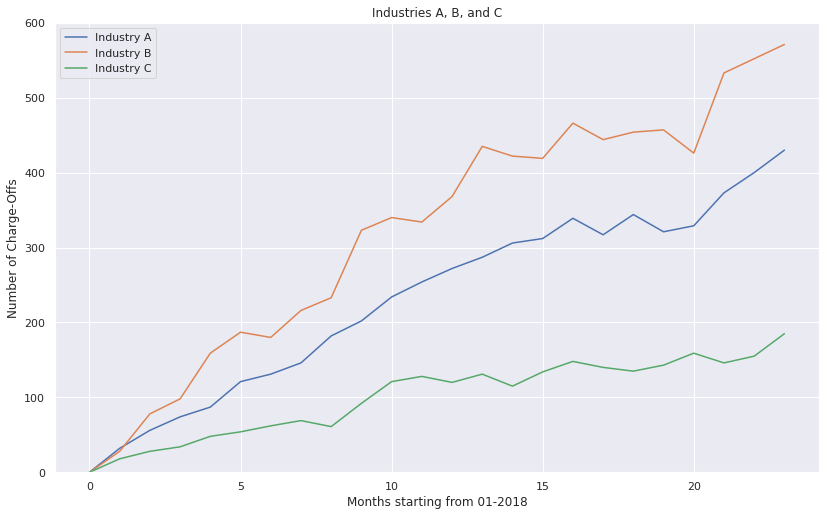

In [136]:
o = df_train['industry'].astype(str)
d = df_train[o == 'A'].groupby('mth_code').sum()

plt.plot(np.arange(0, 24), d['charge_off'], label='Industry A')


o = df_train['industry'].astype(str)
d = df_train[o == 'B'].groupby('mth_code').sum()

plt.plot(np.arange(0, 24), d['charge_off'], label='Industry B' )

o = df_train['industry'].astype(str)
d = df_train[o == 'C'].groupby('mth_code').sum()

plt.title("Industries A, B, and C")
plt.xlabel("Months starting from 01-2018")
plt.ylabel("Number of Charge-Offs")
plt.plot(np.arange(0, 24), d['charge_off'], label='Industry C')
plt.ylim(0, 600)

plt.legend(loc='upper left')
plt.show()

<AxesSubplot:xlabel='bank_fico_buckets_20', ylabel='Count'>

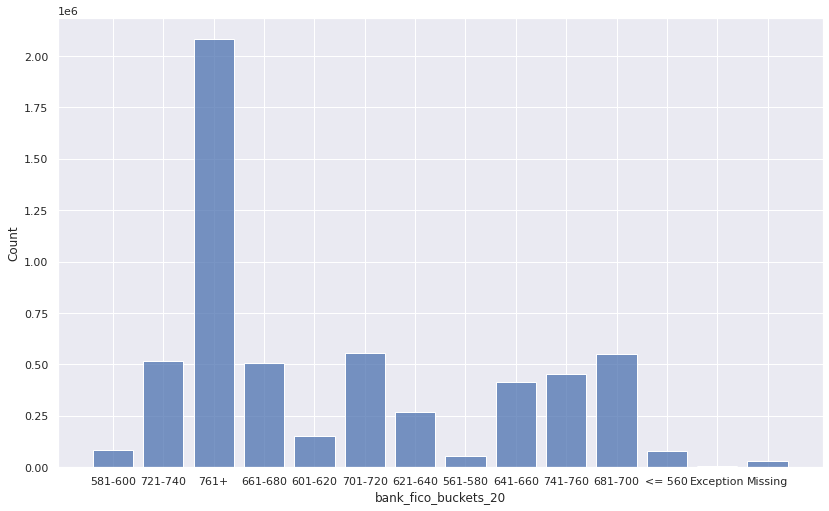

In [135]:
fico_bucket_scores = ['561-580', '581-600', '601-620', '621-640', '641-660', '661-680','681-700', '701-720', '721-740', '741-760', '761+', '<= 560','Exception', 'Missing']

d = d.groupby('bank_fico_buckets_20').sum()
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.histplot(df_train, x='bank_fico_buckets_20', shrink=.8)




In [128]:
d = d.groupby('bank_fico_buckets_20').sum()
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.histplot(df_train, x='bank_fico_buckets_20', shrink=.8)


14

In [57]:
df_train['year'] = df_train['mth_code'] // 100
df_train['month'] = df_train['mth_code'] % 100

In [4]:
df_train_imp = df_train[
    ['financial_active',
     'bank_fico_buckets_20',
     'mob',
     'nbr_mths_due',
     'variable_rate_margin',
     'year',
     'month',
     #'mth_code',
     'charge_off',
     'charge_off_aged',
     'charge_off_bk',
    ]
]



,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758218,0.0,T,1,0,A,1.0,641-660,NaN,41,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,A
5758219,1.0,I,1,0,A,1.0,701-720,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,C
5758220,1.0,R,1,0,I 0-6,1.0,741-760,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B
5758221,0.0,T,1,0,Recovery,1.0,681-700,NaN,50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201912,201912,B


In [27]:
df_train.head()

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B


In [21]:
accuracies = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_train_imp_x, df_train_imp_y, test_size=0.1)
    clf = RandomForestClassifier(max_depth=50)
    clf.fit(X_train, y_train)
    acc = clf.score(X-test, y_test)
    accuracies.append(acc)

0            0
1            0
2            0
3            0
4            0
          ... 
5758218    111
5758219    111
5758220    111
5758221    111
5758222    111
Name: snapshot, Length: 5758223, dtype: int64